ML_RF_SizeStratify_all
* Machine Learning Training Data : size stratification
* Data originally pooled from all technologies


In [1]:
"""
Imports
"""
import pandas as pd
import numpy as np
import graphviz
import io
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from sklearn import preprocessing
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
import plotly.plotly as py
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, precision_score
from sklearn import preprocessing
from ggplot import *
from bokeh.charts import TimeSeries
from bokeh.models import HoverTool
from bokeh.plotting import show
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.charts import Bar, output_file, show
import bokeh.palettes as palettes
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Load data
df_train = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/train/random_sample_SizeBins_szwt_train.csv')
df_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/test/random_sample_SizeBins_szwt_test.csv')

In [3]:
# Load data
df_train_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/train/random_sample_SizeBins_szwt_train.csv')
df_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/test/random_sample_SizeBins_szwt_test.csv')

In [4]:
# Drop select columns [categorical data and columns that would bias the model]
df_train.drop(['index'], axis=1, inplace = True)
df_train.drop(['Ill300x.GT'], axis=1, inplace = True)
df_train.drop(['Ill250.GT'], axis=1, inplace = True)
df_train.drop(['IllMP.GT'], axis=1, inplace = True)
df_train.drop(['TenX.GT'], axis=1, inplace = True)
df_train.drop(['pacbio.GT'], axis=1, inplace = True)
df_train.drop(['GTconflict'], axis=1, inplace = True)
df_train.drop(['GTsupp'], axis=1, inplace = True)
df_train.drop(['sample'], axis=1, inplace = True)
df_train.drop(['SVtype'], axis=1, inplace = True)
df_train.drop(['type'], axis=1, inplace = True)
df_train.drop(['id'], axis=1, inplace = True)
df_train.drop(['New_ID'], axis=1, inplace = True)
df_train.drop(['size_bin'], axis=1, inplace = True)

In [5]:
# Change class label from categorical to numerical
df_train['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_train['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_train['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

In [6]:
# Drop select columns [categorical data and columns that would bias the model]
df_test.drop(['index'], axis=1, inplace = True)
df_test.drop(['Ill300x.GT'], axis=1, inplace = True)
df_test.drop(['Ill250.GT'], axis=1, inplace = True)
df_test.drop(['IllMP.GT'], axis=1, inplace = True)
df_test.drop(['TenX.GT'], axis=1, inplace = True)
df_test.drop(['pacbio.GT'], axis=1, inplace = True)
df_test.drop(['GTconflict'], axis=1, inplace = True)
df_test.drop(['GTsupp'], axis=1, inplace = True)
df_test.drop(['sample'], axis=1, inplace = True)
df_test.drop(['SVtype'], axis=1, inplace = True)
df_test.drop(['type'], axis=1, inplace = True)
df_test.drop(['id'], axis=1, inplace = True)
df_test.drop(['New_ID'], axis=1, inplace = True)
df_test.drop(['size_bin'], axis=1, inplace = True)

In [7]:
# Change class label from categorical to numerical
df_train['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_train['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_train['GTcons'].replace('Homozygous_Variant', 2, inplace=True)
df_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

In [8]:
# Import Training Data
df_20to49 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_20to49_train_.csv')
df_50to99 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_50to99_train_.csv')
df_100to299 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_100to299_train_.csv')
df_300to399 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_300to399_train_.csv')
df_400to499 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_400to499_train_.csv')
df_500to999 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_500to999_train_.csv')
df_1000to5999 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_1000to5999_train_.csv')
df_6000 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_6000_train_.csv')

In [9]:
# Copy Dataframes for later parsing tasks
df_20to49_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_20to49_train.csv')
df_50to99_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_50to99_train.csv')
df_100to299_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_100to299_train.csv')
df_300to399_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_300to399_train.csv')
df_400to499_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_400to499_train.csv')
df_500to999_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_500to999_train.csv')
df_1000to5999_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_1000to5999_train.csv')
df_6000_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_6000_train.csv')

In [10]:
df_20to49['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_20to49['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_20to49['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_50to99['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_50to99['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_50to99['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_100to299['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_100to299['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_100to299['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_300to399['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_300to399['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_300to399['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_400to499['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_400to499['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_400to499['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_500to999['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_500to999['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_500to999['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_1000to5999['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_1000to5999['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_1000to5999['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_6000['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_6000['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_6000['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

<a id='imbalance'></a>

<a id='hom_ref'></a>

In [11]:
# Import Test Data
df_20to49_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_20to49_test_.csv')
df_50to99_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_50to99_test_.csv')
df_100to299_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_100to299_test_.csv')
df_300to399_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_300to399_test_.csv')
df_400to499_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_400to499_test_.csv')
df_500to999_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_500to999_test_.csv')
df_1000to5999_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_1000to5999_test_.csv')
df_6000_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_6000_test_.csv')

In [12]:
# Import Test Data
df_20to49_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_20to49_test.csv')
df_50to99_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_50to99_test.csv')
df_100to299_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_100to299_test.csv')
df_300to399_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_300to399_test.csv')
df_400to499_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_400to499_test.csv')
df_500to999_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_500to999_test.csv')
df_1000to5999_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_1000to5999_test.csv')
df_6000_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_6000_test.csv')

In [13]:
df_20to49_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_20to49_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_20to49_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_50to99_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_50to99_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_50to99_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_100to299_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_100to299_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_100to299_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_300to399_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_300to399_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_300to399_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_400to499_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_400to499_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_400to499_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_500to999_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_500to999_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_500to999_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_1000to5999_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_1000to5999_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_1000to5999_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_6000_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_6000_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_6000_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

In [14]:
df_20to49_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_20to49_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_20to49_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_50to99_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_50to99_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_50to99_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_100to299_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_100to299_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_100to299_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_300to399_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_300to399_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_300to399_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_400to499_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_400to499_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_400to499_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_500to999_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_500to999_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_500to999_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_1000to5999_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_1000to5999_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_1000to5999_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_6000_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_6000_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_6000_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

In [15]:
# # Store header names in lists and find names that are NOT contained in BOTH lists
# c = list(df_train.columns.values)
# d = list(df_test.columns.values)
# set(d) - set(c)

***
EDA

Size distribution of sampled data set [all size datasets pooled]
***

In [16]:
# df_train = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/train/random_sample_SizeBins_szwt_train.csv')
# df_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/test/random_sample_SizeBins_szwt_test.csv')

In [17]:
# df_train['Size'].abs()
# df_test['Size'].abs()
# df_test = df_test[df_test['Size'] >= 20]

# df_train['log_size'] = np.log10(df_train.Size)
# df_test['log_size'] = np.log10(df_test.Size)

In [18]:
# sns.set_style("white")
# p = df_train['log_size'].hist(alpha = 0.5, bins = 30, edgecolor='black', label='hom_var')
# p.grid(False)
# p.set_xlabel('Size[log10]')
# p.set_ylabel('Frequency')
# p.set_title('Training Set')
# # plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/SizeDist_training.png', bbox_inches='tight') 

In [19]:
# sns.set_style("white")
# p = df_test['log_size'].hist(alpha = 0.5, bins = 30, edgecolor='black', label='hom_var')
# p.grid(False)
# p.set_xlabel('Size[log10]')
# p.set_ylabel('Frequency')
# p.set_title('Test Set')
# plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/SizeDist_test.png', bbox_inches='tight') 

***
**All Size Data**
***

***
Impute missing values using KNN
***

In [20]:
# Store training data in a new variable which will be converted to a matrix
X = df_train
X.shape

(2750, 177)

In [21]:
# Convert dataframe to matrix
X=X.as_matrix()

#Imput missing values from three closest observations
X_imputed=KNN(k=3).complete(X)
X=pd.DataFrame(X_imputed)

Imputing row 1/2750 with 2 missing, elapsed time: 6.317
Imputing row 101/2750 with 2 missing, elapsed time: 6.374
Imputing row 201/2750 with 2 missing, elapsed time: 6.388
Imputing row 301/2750 with 1 missing, elapsed time: 6.407
Imputing row 401/2750 with 1 missing, elapsed time: 6.417
Imputing row 501/2750 with 1 missing, elapsed time: 6.435
Imputing row 601/2750 with 2 missing, elapsed time: 6.446
Imputing row 701/2750 with 2 missing, elapsed time: 6.461
Imputing row 801/2750 with 1 missing, elapsed time: 6.475
Imputing row 901/2750 with 2 missing, elapsed time: 6.492
Imputing row 1001/2750 with 2 missing, elapsed time: 6.509
Imputing row 1101/2750 with 2 missing, elapsed time: 6.522
Imputing row 1201/2750 with 30 missing, elapsed time: 6.539
Imputing row 1301/2750 with 2 missing, elapsed time: 6.554
Imputing row 1401/2750 with 1 missing, elapsed time: 6.570
Imputing row 1501/2750 with 2 missing, elapsed time: 6.593
Imputing row 1601/2750 with 2 missing, elapsed time: 6.609
Imputing

In [22]:
# Store header values in a list, will be used later to re-label the matrix post KNN imputation
df_train_header = list(df_train.columns.values)
X.columns = df_train_header
X.head(3)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,1.0,987.272727,3.792119,22.0,425.090909,70.233318,22.0,0.0,0.0,884.157895,...,9543.921053,4003.733990,38.0,0.0,0.0,0.0,0.0,79919582.0,1.0,1.0
1,1.0,959.482759,17.889740,29.0,448.413793,79.056731,29.0,0.0,0.0,867.683616,...,17745.000000,0.000000,1.0,0.0,0.0,0.0,0.0,141377919.0,1.0,1.0
2,1.0,980.400000,19.255475,30.0,438.800000,68.328325,30.0,0.0,0.0,896.367470,...,9399.681818,3679.967384,22.0,0.0,0.0,0.0,0.0,86326285.0,0.0,0.0


In [23]:
# Store Labels in a new 'Y' DataFrame
Y = pd.DataFrame()
Y = X['GTcons']

In [24]:
#Count the number of labels
pd.value_counts(Y.values, sort=False)

1.0    1338
2.0     529
0.0     883
dtype: int64

In [25]:
# Remove labels from feature set
X.drop(['GTcons'],axis=1, inplace = True)

In [26]:
# Order features
X4 = X.reindex_axis(sorted(X.columns), axis=1)

***
Machine Learning
***

<a id='machine_learning'></a>

** Train Random Forest Classifier **

<a id='multi_run'></a>

** Determine Number of trees: Out of Bag Error **

In [27]:
# Train Test Split
# Train on 70% of the data and test on 30%
X_train, X_test, y_train, y_test = train_test_split(X4, Y, test_size=0.3)

In [28]:
model = RandomForestClassifier(oob_score=True, class_weight='balanced') 
model.fit(X_train, y_train)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.



RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

**NOTE :** 

Determined OOB score based on 70% of the training data

In [29]:
n_estimators = 150
trees = []
oob = []
for i in range(1, n_estimators):
    model.set_params(n_estimators=i)
    model.fit(X_train, y_train)
    trees += [i]
    oob += [model.oob_score_] 

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



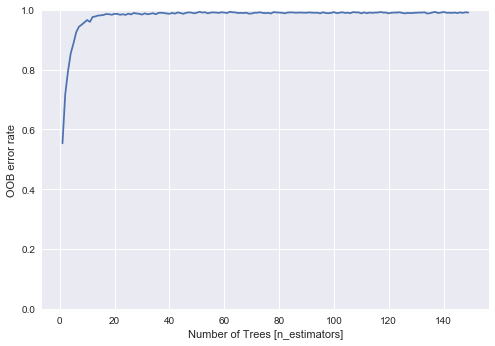

In [30]:
df_oob = pd.DataFrame()
df_oob['trees'] = trees
df_oob['oob'] = oob

ax = plt.plot(trees, oob)
sns.set_style("white")
plt.xlabel("Number of Trees [n_estimators]")
plt.ylim((0,1))
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
# plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/all_OOB.png', bbox_inches='tight')
plt.show()

** Train Model Using Optimal Tuning Parameters**

In [31]:
model = RandomForestClassifier(n_estimators=22, random_state=4, class_weight="balanced") 
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=22, n_jobs=1, oob_score=False, random_state=4,
            verbose=0, warm_start=False)

[Another Resource](https://stackoverflow.com/questions/37877542/how-to-label-the-feature-importance-with-forests-of-trees)

In [32]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

<a id='100_trees'></a>

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning:

sort is deprecated, use sort_values(inplace=True) for INPLACE sorting



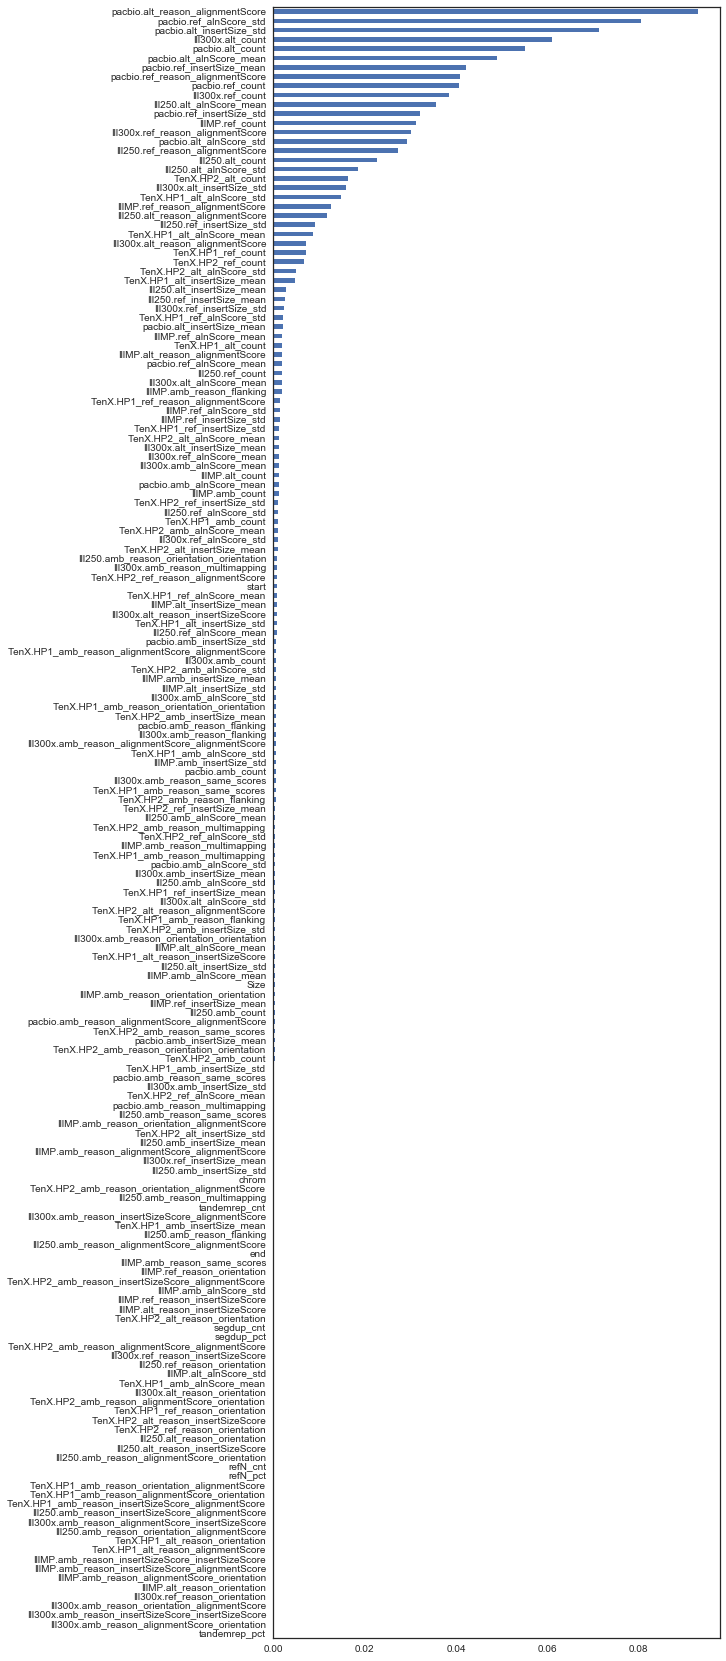

In [33]:
# # %matplotlib inline
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(8,30))
# plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/df_all_featureImportance.png', bbox_inches='tight')
plt.show()

In [34]:
feature_importances.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/all_feature_importance.csv')

In [35]:
X_ = X4[['pacbio.alt_reason_alignmentScore','pacbio.alt_insertSize_std','pacbio.ref_count','pacbio.ref_reason_alignmentScore','pacbio.alt_count','Ill300x.alt_count','Ill300x.ref_reason_alignmentScore','pacbio.alt_alnScore_mean','Ill250.alt_alnScore_mean','pacbio.ref_alnScore_std','Ill300x.ref_count','Ill250.alt_alnScore_std','pacbio.ref_insertSize_mean','pacbio.ref_alnScore_mean','pacbio.ref_insertSize_std','IllMP.ref_count','Ill250.ref_reason_alignmentScore','pacbio.alt_alnScore_std','Ill250.alt_count','IllMP.alt_count','pacbio.alt_insertSize_mean','Ill250.ref_alnScore_std','TenX.HP2_alt_count','IllMP.ref_alnScore_std','TenX.HP1_alt_alnScore_std']]

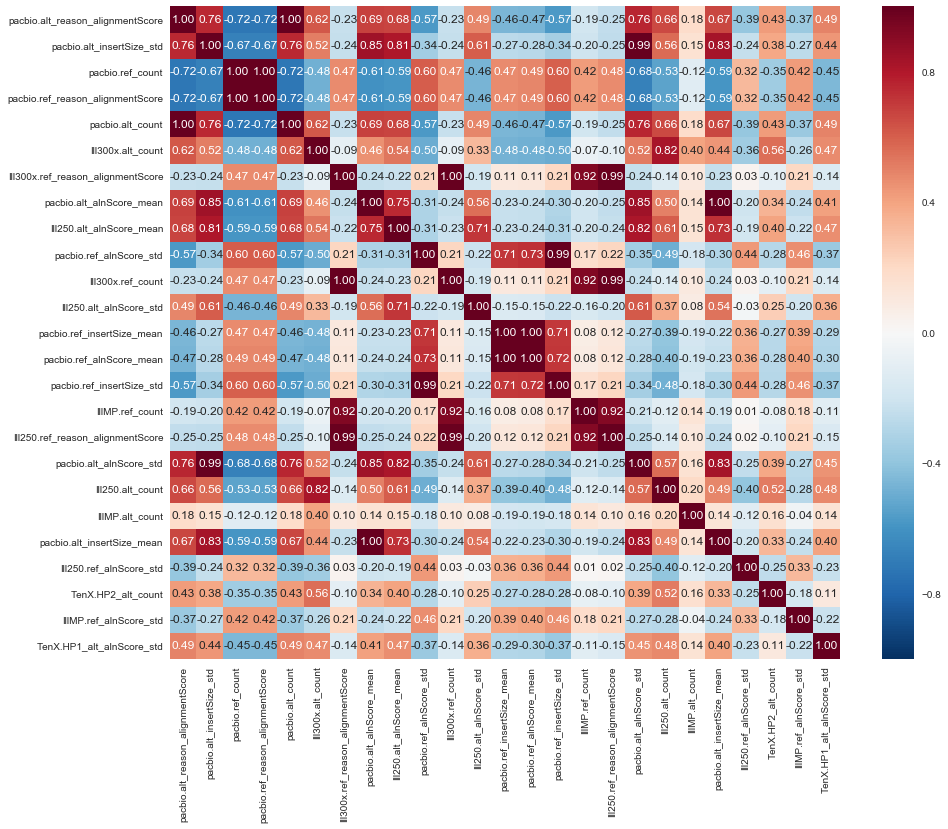

In [36]:
plt.figure(figsize=(15, 12))
sns.heatmap(X_.corr(), annot=True, fmt=".2f")
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
# plt.figure(figsize=(18, 18))
plt.show()
# plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/df_all_heatmap.png', bbox_inches='tight')

In [37]:
#NOTE: Training Set - Show number of Hom Ref, Hom Var, Het Var datapoints the model was trained on
ytrain = pd.DataFrame()
ytrain['ytrain'] = y_train
pd.value_counts(ytrain['ytrain'].values, sort=False)

0.0    618
1.0    943
2.0    364
dtype: int64

<a id='prediction_step'></a>

In [38]:
pred = model.predict(X_test)

<a id='traintest_precision'></a>

In [39]:
print('Precision score of the training subset: {:.3f}'.format(precision_score(y_test, pred, average='micro'))) 

Precision score of the training subset: 0.990


In [40]:
from sklearn.metrics import accuracy_score
print('Accuracy score of the training subset: {:.3f}'.format(accuracy_score(y_test, pred))) 

Accuracy score of the training subset: 0.990


In [41]:
# Add original labels and predicted labels back to the original dataframe
df_Xtest = pd.DataFrame(X_test)
df_Xtest.head()

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
2556,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,912.575610,133.627733,...,8610.404762,3925.113799,42.0,0.0,0.0,2.0,0.008092,26829046.0,2.0,0.043931
116,977.047619,8.850484,21.0,444.190476,83.015557,21.0,0.0,0.0,889.825641,155.653990,...,9760.000000,4749.557425,15.0,0.0,0.0,0.0,0.000000,80490026.0,1.0,1.000000
2376,981.000000,1.632993,3.0,359.000000,34.409301,3.0,0.0,0.0,732.358025,176.642613,...,10596.954550,3654.422669,44.0,0.0,0.0,0.0,0.000000,191038447.0,2.0,0.110256
992,912.000000,3.000000,2.0,448.500000,14.500000,2.0,0.0,0.0,824.471910,157.701082,...,10605.090910,4356.096552,11.0,0.0,0.0,0.0,0.000000,151560965.0,1.0,1.000000
338,965.295455,14.542382,44.0,412.840909,74.175144,44.0,0.0,0.0,878.391304,167.544160,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,17692238.0,1.0,1.000000


In [42]:
labels = pd.DataFrame(y_test)

In [43]:
df_Xtest['predicted_label'] = pred
df_Xtest['GTcons'] = df_train['GTcons']
df_Xtest['chrom'] = df_train['chrom']
df_Xtest['start'] = df_train['start']
df_Xtest['end'] = df_train['end']

In [44]:
df_Xtest['GTcons'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['GTcons'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['GTcons'].replace(2.0, 'Homozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['predicted_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

In [45]:
pd.value_counts(df_Xtest['GTcons'].values, sort=False)

Homozygous_Reference    265
Homozygous_Variant      165
Heterozygous_Variant    395
dtype: int64

In [46]:
pd.value_counts(df_Xtest['predicted_label'].values, sort=False)

Homozygous_Reference    266
Homozygous_Variant      162
Heterozygous_Variant    397
dtype: int64

In [47]:
from sklearn.metrics import confusion_matrix
ytest = df_Xtest['GTcons']
predict = df_Xtest['predicted_label']
print(confusion_matrix(ytest, predict))

[[393   1   1]
 [  2 263   0]
 [  2   2 161]]


In [48]:
pd.crosstab(ytest, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,393,1,1,395
Homozygous_Reference,2,263,0,265
Homozygous_Variant,2,2,161,165
All,397,266,162,825


<a id='traintest_confusion_matrix'></a>

In [49]:
# # Pandas: save table to HTML
# p = pd.crosstab(ytest, predict, rownames=['True'], colnames=['Predicted'], margins=True)
# p.to_html('cro.html')

In [50]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       0.99      0.99      0.99       395
Homozygous_Reference       0.99      0.99      0.99       265
  Homozygous_Variant       0.99      0.98      0.98       165

         avg / total       0.99      0.99      0.99       825



In [51]:
# Train the model with all samples in the training dataset

In [52]:
# model = RandomForestClassifier(n_estimators=20, random_state=4, class_weight="balanced") 
# model.fit(X4, Y)

***
Predict
***

<a id='predict'></a>

** Load Data **

In [ ]:
df_test.drop(['GTcons'],axis=1, inplace=True)

In [ ]:
X2 = df_test

In [ ]:
X2.shape

In [ ]:
# X2_train = 

** Impute missing values using KNN **

In [ ]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

In [ ]:
df_test_header = list(df_test.columns.values)
X2.columns = df_test_header
X2.head(3)

In [ ]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

In [ ]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [ ]:
pred = model.predict(X5)

In [ ]:
pred_prob = model.predict_proba(X5)

In [ ]:
pred_prob_log = model.predict_log_proba(X5)

In [ ]:
X5['predicted_label'] = pred
X5['chrom'] = df_test_['chrom']
X5['GTcons'] = df_test_['GTcons']
X5['start'] = df_test_['start']
X5['end'] = df_test_['end']
X5['Size'] = df_test_['Size']
# X5['GTsupp'] = df_6000_test_['GTsupp']

In [ ]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [ ]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/df_all_.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/all/df_all_log.csv', index=False)

In [53]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/df_all_.csv')

In [54]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [55]:
X6.head(3)

,Homozygous_Reference_GTcons,Heterozygous_Variant_GTcons,Homozygous_Variant_GTcons,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,...,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,predicted_GTcons_label,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.045455,0.954545,0.0,Heterozygous_Variant,977.700000,17.343875,20.0,451.850000,87.001882,17.0,...,2027.435476,10.544337,1,0,0,4,0.076523,72766323,110,0.059979
1,0.000000,1.000000,0.0,Heterozygous_Variant,988.000000,4.992302,26.0,449.000000,98.968526,23.0,...,4504.705061,26.000000,1,0,0,0,0.000000,96139975,2,0.014487
2,0.000000,0.000000,1.0,Homozygous_Variant,939.871795,32.456819,39.0,455.461538,88.430429,39.0,...,0.000000,0.000000,2,0,0,1,0.666667,2891239,1,1.000000


In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/df_all_final.csv', index=False)

In [56]:
X6['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
X6['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

In [ ]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X7['GTcons'].isnull().sum()

***
Label Analysis
***

In [57]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[ 947   19    1]
 [   8 1517    1]
 [   0   11  581]]


In [58]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [59]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 0.987


In [60]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 0.987


In [61]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,1517,8,1,1526
Homozygous_Reference,19,947,1,967
Homozygous_Variant,11,0,581,592
All,1547,955,583,3085


** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [62]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [63]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,1324,0,0,1324
Homozygous_Reference,1,869,0,870
Homozygous_Variant,0,0,461,461
All,1325,869,461,2655


In [64]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00      1324
Homozygous_Reference       1.00      1.00      1.00       870
  Homozygous_Variant       1.00      1.00      1.00       461

         avg / total       1.00      1.00      1.00      2655



<font color='red'>**TODO:** Find out why the following dataframes give low scores. Probably a parsing problem</font>
    
    * 50-99
    * 100-299
    * 400-499
    * 500-999

***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 50-99
***

<a id='predict'></a>

** Load Data **

* Pool all datasets with large variants 50-99

In [ ]:
df_50to99 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_50to99_test_.csv')

In [ ]:
df = pd.concat([df_50to99, df_50to99_test], axis=0)
df = df.reset_index()
df_ = pd.concat([df_50to99_, df_50to99_test_], axis=0)
df_ = df_.reset_index()

In [ ]:
df_.GTcons.dtypes

In [ ]:
df.head(1)

In [ ]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)
df_.drop(['index'],axis=1, inplace=True)

In [ ]:
X2 = df

** Impute missing values using KNN **

In [ ]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

In [ ]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

In [ ]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

In [ ]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [ ]:
pred = model.predict(X5)

In [ ]:
pred_prob = model.predict_proba(X5)

In [ ]:
pred_prob_log = model.predict_log_proba(X5)

In [ ]:
df[df.index.duplicated()]

In [ ]:
X5['predicted_label'] = pred
X5['chrom'] = df_['chrom']
X5['GTcons'] = df_['GTcons']
X5['start'] = df_['start']
X5['end'] = df_['end']
X5['Size'] = df_['Size']
X5['GTsupp'] = df_['GTsupp']

In [ ]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [ ]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/50to99_predLrg_.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/50to99_log._predLrgcsv', index=False)

In [ ]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/50to99_predLrg.csv')

In [ ]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [ ]:
X6['GTcons'].replace('Homozygous_Reference', '0', inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', '1', inplace=True)
X6['GTcons'].replace('Homozygous_Variant', '2', inplace=True)

In [ ]:
X6.head(3)

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/50to99_final_predLrg.csv', index=False)

In [ ]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X6['predicted_GTcons_label'].isnull().sum()

In [ ]:
X6['predicted_GTcons_label'].dtypes

In [ ]:
X6.GTcons = X6.GTcons.astype(int)

In [ ]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

***
Label Analysis
***

In [ ]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

In [ ]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [ ]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

In [ ]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

In [ ]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [ ]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [ ]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 100 - 299 bp
***

<a id='predict'></a>

** Load Data **

* Pool all datasets with large variants 100 - 299

In [ ]:
df = pd.concat([df_100to299, df_100to299_test], axis=0)
df = df.reset_index()
df2 = pd.concat([df_100to299_, df_100to299_test_], axis=0)
df2 = df2.reset_index()

In [ ]:
df2['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df2['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df2['GTcons'].replace('Homozygous_Variant', 2, inplace=True)
# df['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
# df['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
# df['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

In [ ]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)
df2.drop(['index'],axis=1, inplace=True)

In [ ]:
X2 = df

** Impute missing values using KNN **

In [ ]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

In [ ]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

In [ ]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

In [ ]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [ ]:
pred = model.predict(X5)

In [ ]:
pred_prob = model.predict_proba(X5)

In [ ]:
pred_prob_log = model.predict_log_proba(X5)

In [ ]:
df[df.index.duplicated()]

In [ ]:
X5['predicted_label'] = pred
X5['chrom'] = df2['chrom']
X5['GTcons'] = df2['GTcons']
X5['start'] = df2['start']
X5['end'] = df2['end']
X5['Size'] = df2['Size']
# X5['GTsupp'] = df['GTsupp']

In [ ]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [ ]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/100to299_predLrg.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/all_log_100to299_.csv', index=False)

In [ ]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/100to299_predLrg.csv')

In [ ]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [ ]:
X6['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
X6['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

In [ ]:
X6.head(3)

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/500to999_final_predLrg.csv', index=False)

In [ ]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X6['predicted_GTcons_label'].isnull().sum()

In [ ]:
X6['predicted_GTcons_label'].dtypes

In [ ]:
X6.GTcons = X6.GTcons.astype(int)

In [ ]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

***
Label Analysis
***

In [ ]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

In [ ]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [ ]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

In [ ]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

In [ ]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [ ]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [ ]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 500 - 999 bp
***

<a id='predict'></a>

** Load Data **

* Pool all datasets with large variants 500 - 999

In [ ]:
df = pd.concat([df_500to999, df_500to999_test], axis=0)
df = df.reset_index()
df2 = pd.concat([df_500to999_, df_500to999_test_], axis=0)
df2 = df2.reset_index()

In [ ]:
df2['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df2['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df2['GTcons'].replace('Homozygous_Variant', 2, inplace=True)
# df['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
# df['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
# df['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

In [ ]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)
df2.drop(['index'],axis=1, inplace=True)

In [ ]:
X2 = df

** Impute missing values using KNN **

In [ ]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

In [ ]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

In [ ]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

In [ ]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [ ]:
pred = model.predict(X5)

In [ ]:
pred_prob = model.predict_proba(X5)

In [ ]:
pred_prob_log = model.predict_log_proba(X5)

In [ ]:
df[df.index.duplicated()]

In [ ]:
X5['predicted_label'] = pred
X5['chrom'] = df2['chrom']
X5['GTcons'] = df2['GTcons']
X5['start'] = df2['start']
X5['end'] = df2['end']
X5['Size'] = df2['Size']
# X5['GTsupp'] = df['GTsupp']

In [ ]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [ ]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/500to999_predLrg.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/all_log_500to999_.csv', index=False)

In [ ]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/500to999_predLrg.csv')

In [ ]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [ ]:
X6['GTcons'].replace('Homozygous_Reference', '0', inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', '1', inplace=True)
X6['GTcons'].replace('Homozygous_Variant', '2', inplace=True)

In [ ]:
X6.head(3)

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/500to999_final_predLrg.csv', index=False)

In [ ]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X6['predicted_GTcons_label'].isnull().sum()

In [ ]:
X6['predicted_GTcons_label'].dtypes

In [ ]:
X6.GTcons = X6.GTcons.astype(int)

In [ ]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

***
Label Analysis
***

In [ ]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

In [ ]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [ ]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

In [ ]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

In [ ]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [ ]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [ ]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 1000to5999
***

<a id='predict'></a>

** Load Data **

* Pool all datasets with large variants 1000to5999

In [ ]:
df = pd.concat([df_1000to5999, df_1000to5999_test], axis=0)
df = df.reset_index()
df2 = pd.concat([df_1000to5999, df_1000to5999_test], axis=0)
df2 = df2.reset_index()

In [ ]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)
df2.drop(['index'],axis=1, inplace=True)

In [ ]:
X2 = df

** Impute missing values using KNN **

In [ ]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

In [ ]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

In [ ]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

In [ ]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [ ]:
pred = model.predict(X5)

In [ ]:
pred_prob = model.predict_proba(X5)

In [ ]:
pred_prob_log = model.predict_log_proba(X5)

In [ ]:
df[df.index.duplicated()]

In [ ]:
X5['predicted_label'] = pred
X5['chrom'] = df2['chrom']
X5['GTcons'] = df2['GTcons']
X5['start'] = df2['start']
X5['end'] = df2['end']
X5['Size'] = df2['Size']
# X5['GTsupp'] = df2['GTsupp']

In [ ]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [ ]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/1000to5999_all_predLrg.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/1000to5999_log_all_.csv', index=False)

In [65]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/1000to5999_all_predLrg.csv')

In [66]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [67]:
X6['GTcons'].replace('Homozygous_Reference', '0', inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', '1', inplace=True)
X6['GTcons'].replace('Homozygous_Variant', '2', inplace=True)

In [ ]:
X6.head(3)

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/1000to5999_final_all_predLrg.csv', index=False)

In [ ]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X6['predicted_GTcons_label'].isnull().sum()

In [68]:
X6['predicted_GTcons_label'].dtypes

dtype('int64')

In [69]:
X6.GTcons = X6.GTcons.astype(int)

In [70]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

0    93
1    80
2    54
dtype: int64


***
Label Analysis
***

In [71]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[90  3  0]
 [ 0 80  0]
 [ 0  2 52]]


In [72]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [73]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 0.978


In [74]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 0.978


In [75]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,80,0,0,80
Homozygous_Reference,3,90,0,93
Homozygous_Variant,2,0,52,54
All,85,90,52,227


** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [76]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [77]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,73,0,0,73
Homozygous_Reference,3,80,0,83
Homozygous_Variant,2,0,49,51
All,78,80,49,207


In [78]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       0.94      1.00      0.97        73
Homozygous_Reference       1.00      0.96      0.98        83
  Homozygous_Variant       1.00      0.96      0.98        51

         avg / total       0.98      0.98      0.98       207



***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 300to399
***

<a id='predict'></a>

** Load Data **

* Pool all datasets with large variants 300to399

In [ ]:
df = pd.concat([df_300to399, df_300to399_test], axis=0)
df = df.reset_index()
df2 = pd.concat([df_300to399, df_300to399_test], axis=0)
df2 = df2.reset_index()

In [ ]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)
df2.drop(['index'],axis=1, inplace=True)

In [ ]:
X2 = df

** Impute missing values using KNN **

In [ ]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

In [ ]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

In [ ]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

In [ ]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [ ]:
pred = model.predict(X5)

In [ ]:
pred_prob = model.predict_proba(X5)

In [ ]:
pred_prob_log = model.predict_log_proba(X5)

In [ ]:
df[df.index.duplicated()]

In [ ]:
X5['predicted_label'] = pred
X5['chrom'] = df2['chrom']
X5['GTcons'] = df2['GTcons']
X5['start'] = df2['start']
X5['end'] = df2['end']
X5['Size'] = df2['Size']
# X5['GTsupp'] = df2['GTsupp']

In [ ]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [ ]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/300to399_all_predLrg.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/300to399_log_all_.csv', index=False)

In [94]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/300to399_all_predLrg.csv')

In [95]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [96]:
X6['GTcons'].replace('Homozygous_Reference', '0', inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', '1', inplace=True)
X6['GTcons'].replace('Homozygous_Variant', '2', inplace=True)

In [97]:
X6.head(3)

,Homozygous_Reference_GTcons,Heterozygous_Variant_GTcons,Homozygous_Variant_GTcons,GTcons,predicted_GTcons_label,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.0,1.0,0.0,1,1,956.600000,13.402985,20.0,491.750000,130.580196,...,9372.850000,4264.606667,20.0,0,0,0,0.0,61293639,1,0.073248
1,0.0,1.0,0.0,1,1,989.689655,8.662656,29.0,426.344828,71.370947,...,9514.275862,3367.674015,29.0,0,0,0,0.0,7542309,1,0.113333
2,0.0,0.0,1.0,2,2,983.905660,19.518993,53.0,428.754717,92.500057,...,0.000000,0.000000,0.0,0,0,0,0.0,46067964,2,0.211429


In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/300to399_final_all_predLrg.csv', index=False)

In [ ]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X6['predicted_GTcons_label'].isnull().sum()

In [98]:
X6['predicted_GTcons_label'].dtypes

dtype('int64')

In [99]:
X6.GTcons = X6.GTcons.astype(int)

In [100]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

0    120
1    183
2    194
dtype: int64


***
Label Analysis
***

In [101]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[116   4   0]
 [  1 182   0]
 [  0   0 194]]


In [102]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [103]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 0.990


In [104]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 0.990


In [105]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,182,1,0,183
Homozygous_Reference,4,116,0,120
Homozygous_Variant,0,0,194,194
All,186,117,194,497


** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [106]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [107]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,167,0,0,167
Homozygous_Reference,0,114,0,114
Homozygous_Variant,0,0,187,187
All,167,114,187,468


In [108]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00       167
Homozygous_Reference       1.00      1.00      1.00       114
  Homozygous_Variant       1.00      1.00      1.00       187

         avg / total       1.00      1.00      1.00       468



***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 6000+ bp
***

<a id='predict'></a>

** Load Data **

* Pool all datasets with large variants 6000+

In [ ]:
df = pd.concat([df_6000, df_6000_test], axis=0)
df = df.reset_index()
df2 = pd.concat([df_6000, df_6000_test], axis=0)
df2 = df2.reset_index()

In [ ]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)
df2.drop(['index'],axis=1, inplace=True)

In [ ]:
X2 = df

** Impute missing values using KNN **

In [ ]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

In [ ]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

In [ ]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

In [ ]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [ ]:
pred = model.predict(X5)

In [ ]:
pred_prob = model.predict_proba(X5)

In [ ]:
pred_prob_log = model.predict_log_proba(X5)

In [ ]:
df[df.index.duplicated()]

In [ ]:
X5['predicted_label'] = pred
X5['chrom'] = df2['chrom']
X5['GTcons'] = df2['GTcons']
X5['start'] = df2['start']
X5['end'] = df2['end']
X5['Size'] = df2['Size']
# X5['GTsupp'] = df2['GTsupp']

In [ ]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [ ]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/6000_all_predLrg.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/6000_log_all_.csv', index=False)

In [109]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/6000_all_predLrg.csv')

In [110]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [111]:
X6['GTcons'].replace('Homozygous_Reference', '0', inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', '1', inplace=True)
X6['GTcons'].replace('Homozygous_Variant', '2', inplace=True)

In [ ]:
X6.head(3)

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/6000_final_all_predLrg.csv', index=False)

In [ ]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X6['predicted_GTcons_label'].isnull().sum()

In [112]:
X6['predicted_GTcons_label'].dtypes

dtype('int64')

In [113]:
X6.GTcons = X6.GTcons.astype(int)

In [114]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

0    27
1    20
2    10
dtype: int64


***
Label Analysis
***

In [115]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[27  0  0]
 [ 0 20  0]
 [ 0  0 10]]


In [116]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [117]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 1.000


In [118]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 1.000


In [119]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,20,0,0,20
Homozygous_Reference,0,27,0,27
Homozygous_Variant,0,0,10,10
All,20,27,10,57


** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [120]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [121]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,18,0,0,18
Homozygous_Reference,0,23,0,23
Homozygous_Variant,0,0,10,10
All,18,23,10,51


In [122]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00        18
Homozygous_Reference       1.00      1.00      1.00        23
  Homozygous_Variant       1.00      1.00      1.00        10

         avg / total       1.00      1.00      1.00        51



***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 20 to 49bp
***

<a id='predict'></a>

** Load Data **

* Pool all datasets with large variants 20 to 49bp

In [ ]:
df = pd.concat([df_20to49, df_20to49_test], axis=0)
df = df.reset_index()
df2 = pd.concat([df_20to49, df_20to49_test], axis=0)
df2 = df2.reset_index()

In [ ]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)
df2.drop(['index'],axis=1, inplace=True)

In [ ]:
X2 = df

** Impute missing values using KNN **

In [ ]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

In [ ]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

In [ ]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

In [ ]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [ ]:
pred = model.predict(X5)

In [ ]:
pred_prob = model.predict_proba(X5)

In [ ]:
pred_prob_log = model.predict_log_proba(X5)

In [ ]:
df[df.index.duplicated()]

In [ ]:
X5['predicted_label'] = pred
X5['chrom'] = df2['chrom']
X5['GTcons'] = df2['GTcons']
X5['start'] = df2['start']
X5['end'] = df2['end']
X5['Size'] = df2['Size']
# X5['GTsupp'] = df2['GTsupp']

In [ ]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [ ]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/20to49_all_predsm.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/6000/6000_log_20to49_.csv', index=False)

In [123]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/20to49_all_predsm.csv')

In [124]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [125]:
X6['GTcons'].replace('Homozygous_Reference', '0', inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', '1', inplace=True)
X6['GTcons'].replace('Homozygous_Variant', '2', inplace=True)

In [ ]:
X6.head(3)

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/all/20to49_all_final_predsm.csv', index=False)

In [ ]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X6['predicted_GTcons_label'].isnull().sum()

In [126]:
X6['predicted_GTcons_label'].dtypes

dtype('int64')

In [127]:
X6.GTcons = X6.GTcons.astype(int)

In [128]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

0     945
2     581
1    1824
dtype: int64


***
Label Analysis
***

In [129]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[ 938    7    0]
 [   9 1814    1]
 [   0    8  573]]


In [130]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [131]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 0.993


In [132]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 0.993


In [133]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,1814,9,1,1824
Homozygous_Reference,7,938,0,945
Homozygous_Variant,8,0,573,581
All,1829,947,574,3350


** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [134]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [135]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,1658,0,0,1658
Homozygous_Reference,0,879,0,879
Homozygous_Variant,0,0,457,457
All,1658,879,457,2994


In [136]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00      1658
Homozygous_Reference       1.00      1.00      1.00       879
  Homozygous_Variant       1.00      1.00      1.00       457

         avg / total       1.00      1.00      1.00      2994

